<a href="https://colab.research.google.com/github/Elman295/Self_driving_car/blob/main/Self_driving_car_udacity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#`Data Collection`

In this project, Udacity driving simulator has been used which has two different tracks. One of them was used for collecting training data, and the other one — never seen by the model — as a substitute for the test set.

<br/>
We are going to use camera data as model input and expect it to predict the steering angle in the [-1, 1] range.

[Source](https://github.com/udacity/self-driving-car-sim)

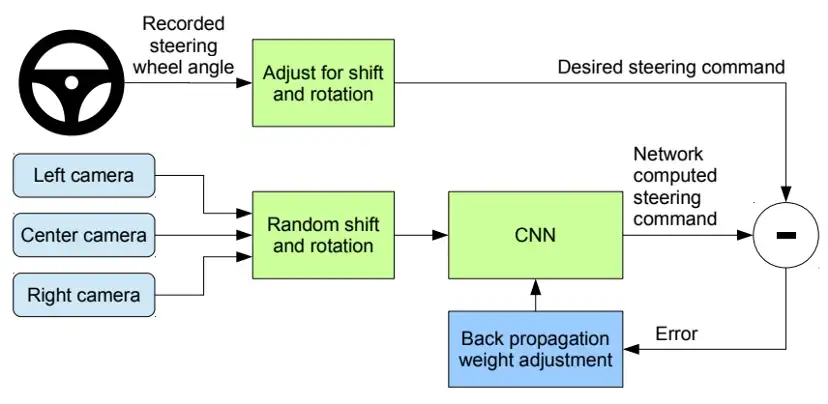

#`Tools`

In [ ]:
import tensorflow as tf
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import pandas as pd
import zipfile
import os
import seaborn as sb
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from imgaug import augmenters as iaa
import random

In [ ]:
sb.set()

[Numpy](https://numpy.org/) <br/>
[Pandas](https://pandas.pydata.org/)<br/>
[Tensorflow](https://www.tensorflow.org/)<br/>
[Open CV](https://opencv.org/)<br/>









#`Describing the Data`

In [ ]:
my_drive = os.path.join("drive","MyDrive")
os.listdir(my_drive)

['Colab Notebooks', 'data', 'traffic_sign', 'train.p adlı dosyanın kopyası']

In [ ]:
archive_zip = os.path.join(my_drive,"data","archive (1).zip")

with zipfile.ZipFile(archive_zip,"r") as f:
  f.extractall("data")


In [ ]:
data_csv_URL = os.path.join("data","data","driving_log.csv")
data = pd.read_csv(data_csv_URL)
data.head(10) 

,center,left,right,steering,throttle,brake,speed
0,IMG/center_2016_12_01_13_30_48_287.jpg,IMG/left_2016_12_01_13_30_48_287.jpg,IMG/right_2016_12_01_13_30_48_287.jpg,0.0,0.0,0.0,22.148290
1,IMG/center_2016_12_01_13_30_48_404.jpg,IMG/left_2016_12_01_13_30_48_404.jpg,IMG/right_2016_12_01_13_30_48_404.jpg,0.0,0.0,0.0,21.879630
2,IMG/center_2016_12_01_13_31_12_937.jpg,IMG/left_2016_12_01_13_31_12_937.jpg,IMG/right_2016_12_01_13_31_12_937.jpg,0.0,0.0,0.0,1.453011
3,IMG/center_2016_12_01_13_31_13_037.jpg,IMG/left_2016_12_01_13_31_13_037.jpg,IMG/right_2016_12_01_13_31_13_037.jpg,0.0,0.0,0.0,1.438419
4,IMG/center_2016_12_01_13_31_13_177.jpg,IMG/left_2016_12_01_13_31_13_177.jpg,IMG/right_2016_12_01_13_31_13_177.jpg,0.0,0.0,0.0,1.418236
5,IMG/center_2016_12_01_13_31_13_279.jpg,IMG/left_2016_12_01_13_31_13_279.jpg,IMG/right_2016_12_01_13_31_13_279.jpg,0.0,0.0,0.0,1.403993
6,IMG/center_2016_12_01_13_31_13_381.jpg,IMG/left_2016_12_01_13_31_13_381.jpg,IMG/right_2016_12_01_13_31_13_381.jpg,0.0,0.0,0.0,1.389892
7,IMG/center_2016_12_01_13_31_13_482.jpg,IMG/left_2016_12_01_13_31_13_482.jpg,IMG/right_2016_12_01_13_31_13_482.jpg,0.0,0.0,0.0,1.375934
8,IMG/center_2016_12_01_13_31_13_584.jpg,IMG/left_2016_12_01_13_31_13_584.jpg,IMG/right_2016_12_01_13_31_13_584.jpg,0.0,0.0,0.0,1.362115
9,IMG/center_2016_12_01_13_31_13_686.jpg,IMG/left_2016_12_01_13_31_13_686.jpg,IMG/right_2016_12_01_13_31_13_686.jpg,0.0,0.0,0.0,1.348435


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8036 entries, 0 to 8035
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   center    8036 non-null   object 
 1   left      8036 non-null   object 
 2   right     8036 non-null   object 
 3   steering  8036 non-null   float64
 4   throttle  8036 non-null   float64
 5   brake     8036 non-null   float64
 6   speed     8036 non-null   float64
dtypes: float64(4), object(3)
memory usage: 439.6+ KB


In [ ]:
data.describe()

,steering,throttle,brake,speed
count,8036.000000,8036.000000,8036.000000,8036.000000
mean,0.004070,0.869660,0.001970,28.169839
std,0.128840,0.301326,0.036565,6.149327
min,-0.942695,0.000000,0.000000,0.502490
25%,0.000000,0.985533,0.000000,30.183093
50%,0.000000,0.985533,0.000000,30.186400
75%,0.000000,0.985533,0.000000,30.186640
max,1.000000,0.985533,1.000000,30.709360


In [ ]:
num_of_bins = 20
hist, bins = np.histogram(data["steering"], bins = num_of_bins)
print(bins)

[-0.9426954  -0.84556063 -0.74842586 -0.65129109 -0.55415632 -0.45702155
 -0.35988678 -0.26275201 -0.16561724 -0.06848247  0.0286523   0.12578707
  0.22292184  0.32005661  0.41719138  0.51432615  0.61146092  0.70859569
  0.80573046  0.90286523  1.        ]


In [ ]:
center = (bins[1:] + bins[:-1]) *0.5
center

array([-0.89412801, -0.79699324, -0.69985847, -0.6027237 , -0.50558894,
       -0.40845416, -0.31131939, -0.21418463, -0.11704985, -0.01991508,
        0.07721968,  0.17435446,  0.27148923,  0.36862399,  0.46575876,
        0.56289353,  0.6600283 ,  0.75716308,  0.85429784,  0.95143261])

In [ ]:
print(len(center))
print(len(hist))
    

20
20


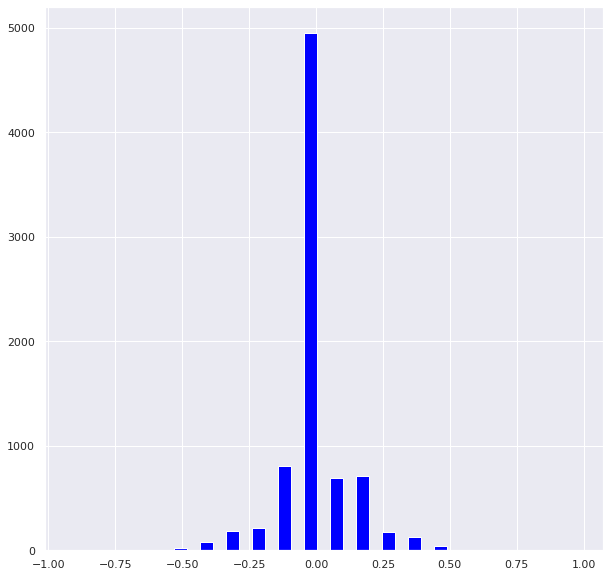

In [ ]:
plt.figure(figsize = (10,10))
plt.bar(center, hist, color = "blue", width = 0.05)
plt.grid(True)
plt.show()

Problem?

#`Balance`

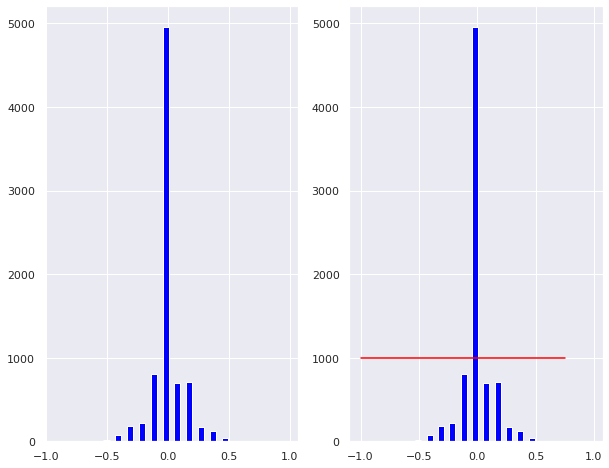

In [ ]:
x = np.arange(start = -1, stop =1 , step = 0.25)
samles_per_bin = 1000
y = [ samles_per_bin for i in range(len(x))]
plt.figure(figsize = (10,8))
plt.subplot(1,2,1)
plt.bar(center, hist, color = "blue", width = 0.05)
plt.subplot(1,2,2)
plt.bar(center, hist, color = "blue", width = 0.05)
plt.plot(x ,y, color = "red")
plt.grid(True)
plt.show()

In [ ]:
removed_index = []
for j in range(num_of_bins):
  indexes = []
  for i in range(len(data["steering"])):
    if data["steering"][i] >= bins[j] and data["steering"][i] <= bins[j+1]:
      indexes.append(i)

  indexes = shuffle(indexes)
  indexes = indexes [samles_per_bin:]
  removed_index.extend(indexes)

data.drop(data.index[removed_index], inplace = True)
  

In [ ]:
print(f"del num : {len(removed_index)}")

del num : 3956


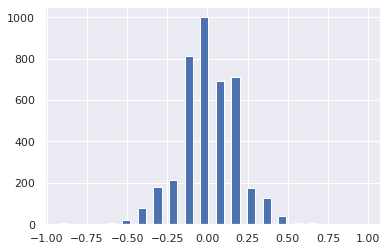

In [ ]:
hist, bins = np.histogram(data['steering'], bins = num_of_bins)
center = (bins[1:] + bins[:-1])*0.5
plt.bar(center, hist, width = 0.05)
plt.show()

#`Splitting the data`

In [ ]:
def load_data(data):
  image_path = []
  steerings = []

  for i in range(len(data)):
    data_indexed = data.iloc[i]
    image_path.append(os.path.join("data","data",data_indexed[0]))
    steerings.append(float(data_indexed[3]))

  image_path = np.asarray(image_path)
  steerings = np.asarray(steerings)
  return image_path, steerings

In [ ]:
images, steerings = load_data(data)


In [ ]:
print(len(images))
print(len(steerings))

4080
4080


In [ ]:
print(images[:10])

['data/data/IMG/center_2016_12_01_13_31_12_937.jpg'
 'data/data/IMG/center_2016_12_01_13_31_13_037.jpg'
 'data/data/IMG/center_2016_12_01_13_31_14_398.jpg'
 'data/data/IMG/center_2016_12_01_13_31_14_803.jpg'
 'data/data/IMG/center_2016_12_01_13_31_15_005.jpg'
 'data/data/IMG/center_2016_12_01_13_31_15_208.jpg'
 'data/data/IMG/center_2016_12_01_13_32_39_212.jpg'
 'data/data/IMG/center_2016_12_01_13_32_40_171.jpg'
 'data/data/IMG/center_2016_12_01_13_32_41_640.jpg'
 'data/data/IMG/center_2016_12_01_13_32_41_943.jpg']


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(images, steerings, test_size=0.2)

In [ ]:
print(f"len of x_train is {len(x_train)}")
print(f"len of x_test is {len(x_test)}")

len of x_train is 3264
len of x_test is 816


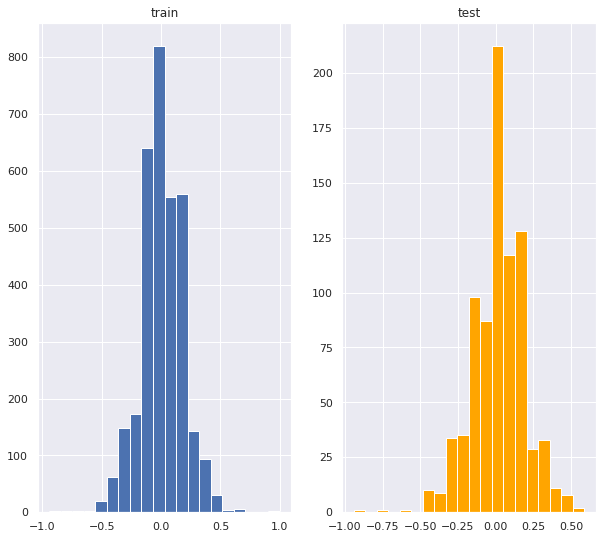

In [ ]:
plt.figure(figsize=(10,9))
plt.subplot(1,2,1)
plt.hist(y_train, bins = num_of_bins)
plt.title("train")
plt.subplot(1,2,2)
plt.title("test")
plt.hist(y_test, bins = num_of_bins, color = "orange")

plt.show()

#`Preprocess`

In [ ]:
def zoom (img_path):
  img = mpimg.imread(img_path)
  zoom = iaa.Affine(scale=(1,1.2))
  img = zoom.augment_image(img)
  return img

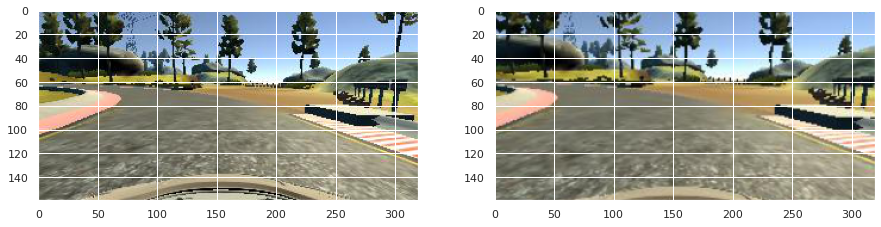

In [ ]:
plt.figure(figsize = (15,15))
img = mpimg.imread("data/data/IMG/center_2016_12_01_13_31_13_686.jpg")
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(zoom("data/data/IMG/center_2016_12_01_13_31_13_686.jpg"))
plt.show()

In [ ]:
def pan (img_path):
  img = mpimg.imread(img_path)
  zoom = iaa.Affine(translate_percent={"x": (-0.1, 0.1), "y": (-0.1, 0.1)})
  img = zoom.augment_image(img)
  return img

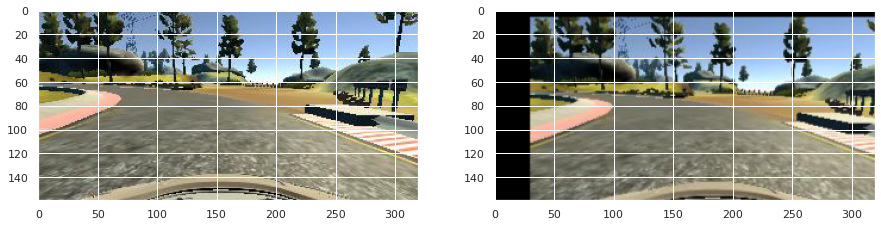

In [ ]:
plt.figure(figsize = (15,15))
img = mpimg.imread("data/data/IMG/center_2016_12_01_13_31_13_686.jpg")
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(pan("data/data/IMG/center_2016_12_01_13_31_13_686.jpg"))
plt.show()

In [ ]:
def brightness (img_path):
  img = mpimg.imread(img_path)
  brightness = iaa.Multiply((0.5,1.2))
  img = brightness.augment_image(img)
  return img

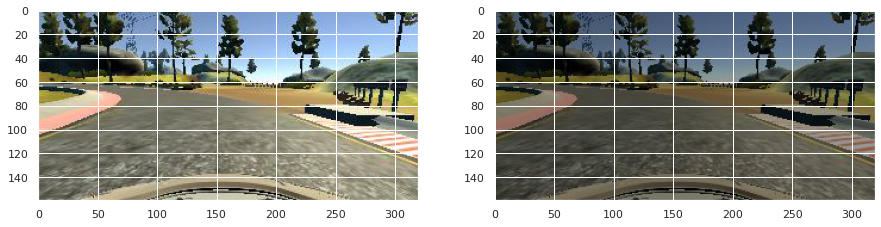

In [ ]:
plt.figure(figsize = (15,15))
img = mpimg.imread("data/data/IMG/center_2016_12_01_13_31_13_686.jpg")
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(brightness("data/data/IMG/center_2016_12_01_13_31_13_686.jpg"))
plt.show()

In [ ]:
def flip (img_path, steering):
  img = mpimg.imread(img_path)
  img = cv.flip(img,1)
  steering = - steering
  return img, steering

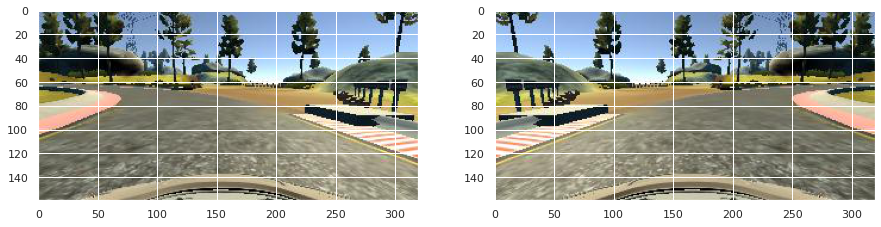

In [ ]:
plt.figure(figsize = (15,15))
img = mpimg.imread("data/data/IMG/center_2016_12_01_13_31_13_686.jpg")
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
img, _ = flip("data/data/IMG/center_2016_12_01_13_31_13_686.jpg", 5)
plt.imshow(img)
plt.show()

In [ ]:
def augmentImage(img_path,steering):
    img =  mpimg.imread(img_path)
    if np.random.rand() < 0.5:
        pan = iaa.Affine(translate_percent={"x": (-0.1, 0.1), "y": (-0.1, 0.1)})
        img = pan.augment_image(img)
    if np.random.rand() < 0.5:
        zoom = iaa.Affine(scale=(1, 1.2))
        img = zoom.augment_image(img)
    if np.random.rand() < 0.5:
        brightness = iaa.Multiply((0.5, 1.2))
        img = brightness.augment_image(img)
    if np.random.rand() < 0.5:
        img = cv.flip(img, 1)
        steering = -steering
    return img, steering

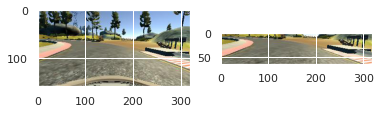

In [ ]:
img = mpimg.imread("data/data/IMG/center_2016_12_01_13_31_13_686.jpg")
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
img = img[55:120,:,:]
plt.imshow(img)
plt.show()

In [ ]:
def preProcess(img):
    img = img[54:120,:,:]
    img = cv.cvtColor(img, cv.COLOR_RGB2YUV)
    img = cv.GaussianBlur(img,  (3, 3), 0)
    img = cv.resize(img, (200, 66))
    img = img/255
    return img

#`Model 1`

In [ ]:
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units = 120, activation = "elu"),
    tf.keras.layers.Dense(units = 100, activation = "elu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units = 1)

])

In [ ]:
# loss = tf.keras.losses.mse()
optimizer = tf.keras.optimizers.Adam()

In [ ]:
model_1.compile(
    optimizer = optimizer,
    loss = "mse",
    metrics = ["accuracy"]
)

In [ ]:
def dataGen(imagesPath, steeringList, batchSize, trainFlag):
    while True:
        imgBatch = []
        steeringBatch = []

        for i in range(batchSize):
            index = random.randint(0, len(imagesPath) - 1)
            if trainFlag:
                img, steering = augmentImage(imagesPath[index], steeringList[index])
            else:
                img = mpimg.imread(imagesPath[index])
                steering = steeringList[index]
            img = preProcess(img)
            imgBatch.append(img)
            steeringBatch.append(steering)
        yield (np.asarray(imgBatch),np.asarray(steeringBatch))

In [ ]:
history = model_1.fit(
    dataGen(x_train, y_train, 100, 1),
    steps_per_epoch = 100,
    epochs = 10

)

Epoch 1/10
100/100 [==============================] - 31s 316ms/step - loss: 0.5962 - accuracy: 0.1620
Epoch 2/10
100/100 [==============================] - 31s 315ms/step - loss: 0.4610 - accuracy: 0.1716
Epoch 3/10
100/100 [==============================] - 32s 324ms/step - loss: 0.3988 - accuracy: 0.1747
Epoch 4/10
100/100 [==============================] - 31s 312ms/step - loss: 0.3769 - accuracy: 0.1708
Epoch 5/10
100/100 [==============================] - 33s 328ms/step - loss: 0.3699 - accuracy: 0.1784
Epoch 6/10
100/100 [==============================] - 31s 312ms/step - loss: 0.3542 - accuracy: 0.1874
Epoch 7/10
100/100 [==============================] - 31s 312ms/step - loss: 0.3602 - accuracy: 0.1821
Epoch 8/10
100/100 [==============================] - 31s 312ms/step - loss: 0.3350 - accuracy: 0.1806
Epoch 9/10
100/100 [==============================] - 31s 313ms/step - loss: 0.3365 - accuracy: 0.1813
Epoch 10/10
100/100 [==============================] - 31s 311ms/step - l

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

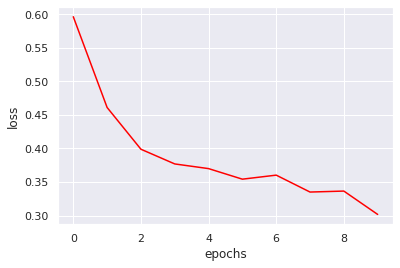

In [ ]:
plt.plot(history.history["loss"], color = "red")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.grid(True)
plt.show()

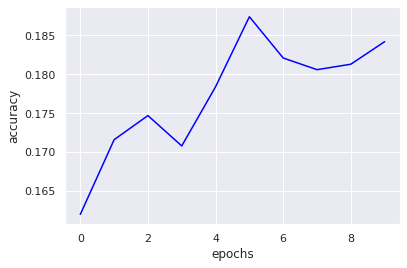

In [ ]:
plt.plot(history.history["accuracy"], color = "blue")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.grid(True)
plt.show()

In [ ]:
model_1.evaluate(dataGen(x_test,y_test,50,0),steps = 50)

50/50 [==============================] - 5s 103ms/step - loss: 0.0437 - accuracy: 0.1844


[0.04366131126880646, 0.18440000712871552]

In [ ]:
model_1.save("model_1.h5")

#`Model 2`

In [ ]:
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 24, kernel_size = (5,5), activation = "elu"),
    tf.keras.layers.Conv2D(filters = 36, kernel_size = (5,5), activation = "elu"),
    tf.keras.layers.Conv2D(filters = 48, kernel_size = (5,5), activation = "elu"),
    tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), activation = "elu"),
    tf.keras.layers.Conv2D(filters = 64, kernel_size = (3,3), activation = "elu"),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units = 100, activation = "elu"),
    tf.keras.layers.Dense(units = 50, activation = "elu"),
    tf.keras.layers.Dense(units = 10, activation = "elu"),
    tf.keras.layers.Dense(units = 1)
])

In [ ]:
optimizer = tf.keras.optimizers.Adam()

In [ ]:
model_2.compile(
    optimizer = optimizer,
    loss = "mse",
    metrics = ["accuracy"]

)

In [ ]:
history_2 = model_2.fit(
    dataGen(x_train, y_train, 100, 1),
    steps_per_epoch = 100,
    epochs = 10,
    validation_data = dataGen(x_test, y_test, 50, 0),
    validation_steps = 50
)

Epoch 1/10
100/100 [==============================] - 46s 458ms/step - loss: 0.1653 - accuracy: 0.2191 - val_loss: 0.1702 - val_accuracy: 0.1896
Epoch 2/10
100/100 [==============================] - 44s 439ms/step - loss: 0.1499 - accuracy: 0.2217 - val_loss: 0.1522 - val_accuracy: 0.1988
Epoch 3/10
100/100 [==============================] - 45s 449ms/step - loss: 0.1321 - accuracy: 0.2275 - val_loss: 0.1425 - val_accuracy: 0.1952
Epoch 4/10
100/100 [==============================] - 43s 435ms/step - loss: 0.1210 - accuracy: 0.2191 - val_loss: 0.1194 - val_accuracy: 0.1924
Epoch 5/10
100/100 [==============================] - 44s 439ms/step - loss: 0.1042 - accuracy: 0.2279 - val_loss: 0.1068 - val_accuracy: 0.2000
Epoch 6/10
100/100 [==============================] - 43s 433ms/step - loss: 0.0931 - accuracy: 0.2143 - val_loss: 0.0956 - val_accuracy: 0.1948
Epoch 7/10
100/100 [==============================] - 43s 435ms/step - loss: 0.0811 - accuracy: 0.2309 - val_loss: 0.0841 - val_ac

In [ ]:
history_2.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

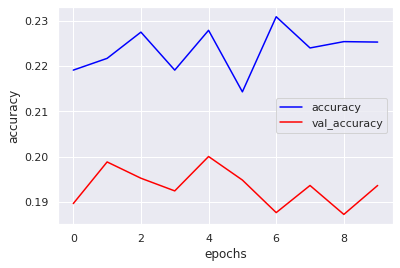

In [ ]:
plt.plot(history_2.history["accuracy"], color = "blue", label = "accuracy")
plt.plot(history_2.history["val_accuracy"], color = "red", label = "val_accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.grid(True)
plt.show()

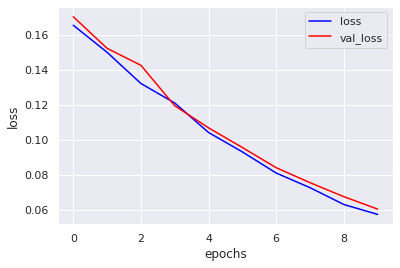

In [ ]:
plt.plot(history_2.history["loss"], color = "blue", label = "loss")
plt.plot(history_2.history["val_loss"], color = "red", label = "val_loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
model_2.save("model_2.h5")

#`Model 3`

In [ ]:
model_3 = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(24,(5,5),(2,2),input_shape = (66,200,3),activation="elu"),
    tf.keras.layers.Conv2D(36,(5,5),(2,2),input_shape = (66,200,3),activation="elu"),
    tf.keras.layers.Conv2D(64,(3,3),(2,2),input_shape = (66,200,3),activation="elu"),
    tf.keras.layers.Conv2D(64,(3,3),(2,2),input_shape = (66,200,3),activation="elu"),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units = 100, activation = "elu"),
    tf.keras.layers.Dense(units = 50, activation = "elu"),
    tf.keras.layers.Dense(units = 10, activation = "elu"),
    tf.keras.layers.Dense(units = 1)

])
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 31, 98, 24)        1824      
                                                                 
 conv2d_10 (Conv2D)          (None, 14, 47, 36)        21636     
                                                                 
 conv2d_11 (Conv2D)          (None, 6, 23, 64)         20800     
                                                                 
 conv2d_12 (Conv2D)          (None, 2, 11, 64)         36928     
                                                                 
 flatten_3 (Flatten)         (None, 1408)              0         
                                                                 
 dense_11 (Dense)            (None, 100)               140900    
                                                                 
 dense_12 (Dense)            (None, 50)               

In [ ]:
optimizer = tf.keras.optimizers.Adam()

In [ ]:
model_3.compile(
    optimizer = optimizer,
    loss = "mse",
    metrics = ["accuracy"]
)

In [ ]:
history_3 = model_3.fit(
    dataGen(x_train, y_train, 10,1),
    steps_per_epoch = 20,
    epochs = 20,
    validation_data = dataGen(x_test, y_test, 10, 0),
    validation_steps = 20
)

Epoch 1/20
20/20 [==============================] - 6s 306ms/step - loss: 0.0312 - accuracy: 0.2100 - val_loss: 0.0265 - val_accuracy: 0.1932
Epoch 2/20
20/20 [==============================] - 5s 278ms/step - loss: 0.0284 - accuracy: 0.2100 - val_loss: 0.0270 - val_accuracy: 0.1964
Epoch 3/20
20/20 [==============================] - 6s 307ms/step - loss: 0.0368 - accuracy: 0.1850 - val_loss: 0.0239 - val_accuracy: 0.1980
Epoch 4/20
20/20 [==============================] - 5s 279ms/step - loss: 0.0233 - accuracy: 0.2650 - val_loss: 0.0301 - val_accuracy: 0.1796
Epoch 5/20
20/20 [==============================] - 5s 281ms/step - loss: 0.0353 - accuracy: 0.2150 - val_loss: 0.0237 - val_accuracy: 0.2000
Epoch 6/20
20/20 [==============================] - 5s 277ms/step - loss: 0.0363 - accuracy: 0.2100 - val_loss: 0.0262 - val_accuracy: 0.1944
Epoch 7/20
20/20 [==============================] - 11s 577ms/step - loss: 0.0290 - accuracy: 0.2300 - val_loss: 0.0276 - val_accuracy: 0.2056
Epoch

In [ ]:
history_3.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

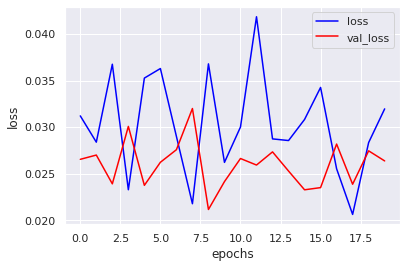

In [ ]:
plt.plot(history_3.history["loss"], color = "blue", label = "loss")
plt.plot(history_3.history["val_loss"], color = "red", label = "val_loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.grid(True)
plt.show()

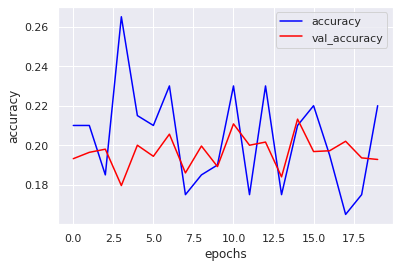

In [ ]:
plt.plot(history_3.history["accuracy"], color = "blue", label = "accuracy")
plt.plot(history_3.history["val_accuracy"], color = "red", label = "val_accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
model_3.save("model_3.h5")

#`Model 4`

In [ ]:
model_4 = tf.keras.models.Sequential([
        
    tf.keras.layers.Conv2D(128,(3,3),input_shape = (66,200,3),activation="elu"),
    tf.keras.layers.Conv2D(128,(3,3),input_shape = (66,200,3),activation="elu"),
    tf.keras.layers.Conv2D(100,(3,3),input_shape = (66,200,3),activation="elu"),
        
    tf.keras.layers.Conv2D(64,(3,3),input_shape = (66,200,3),activation="elu"),
    tf.keras.layers.Conv2D(32,(3,3),input_shape = (66,200,3),activation="elu"),

        
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1)

    
])
model_4.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_105 (Conv2D)         (None, 64, 198, 128)      3584      
                                                                 
 conv2d_106 (Conv2D)         (None, 62, 196, 128)      147584    
                                                                 
 conv2d_107 (Conv2D)         (None, 60, 194, 100)      115300    
                                                                 
 conv2d_108 (Conv2D)         (None, 58, 192, 64)       57664     
                                                                 
 conv2d_109 (Conv2D)         (None, 56, 190, 32)       18464     
                                                                 
 flatten_14 (Flatten)        (None, 340480)            0         
                                                                 
 dense_28 (Dense)            (None, 1)               

In [ ]:
model_4.compile(
    optimizer = optimizer,
    loss = "mse",
    metrics = ["accuracy"] 
)

In [ ]:
history_4 = model_4.fit(
    dataGen(x_train, y_train, 10, 1),
    steps_per_epoch = 20,
    epochs = 20
)

Epoch 1/20
20/20 [==============================] - 4s 61ms/step - loss: 15668904.0000 - accuracy: 0.0700
Epoch 2/20
20/20 [==============================] - 1s 61ms/step - loss: 2323465.0000 - accuracy: 0.1100
Epoch 3/20
20/20 [==============================] - 1s 61ms/step - loss: 306328.4688 - accuracy: 0.1000
Epoch 4/20
20/20 [==============================] - 1s 61ms/step - loss: 48213.3516 - accuracy: 0.1350
Epoch 5/20
20/20 [==============================] - 1s 61ms/step - loss: 16716.3379 - accuracy: 0.0950
Epoch 6/20
20/20 [==============================] - 1s 61ms/step - loss: 10423.0371 - accuracy: 0.1150
Epoch 7/20
20/20 [==============================] - 1s 61ms/step - loss: 7056.3198 - accuracy: 0.1050
Epoch 8/20
20/20 [==============================] - 1s 61ms/step - loss: 7373.2837 - accuracy: 0.1550
Epoch 9/20
20/20 [==============================] - 1s 61ms/step - loss: 8296.6230 - accuracy: 0.0950
Epoch 10/20
20/20 [==============================] - 1s 61ms/step - lo

In [ ]:
history_4.history.keys()

dict_keys(['loss', 'accuracy'])

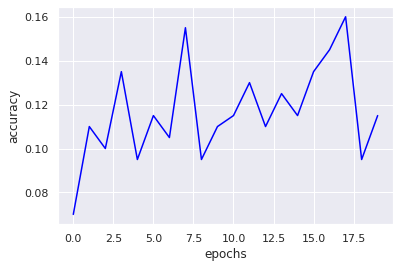

In [ ]:
plt.plot(history_4.history["accuracy"], color = "blue")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.grid(True)
plt.show()

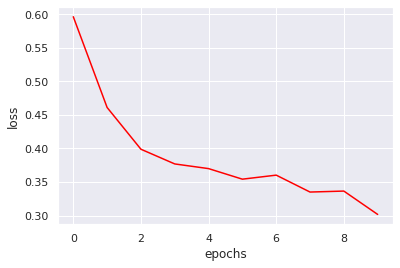

In [ ]:
plt.plot(history.history["loss"], color = "red")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.grid(True)
plt.show()

In [ ]:
model_4.save("model_4.h5")